<h1>2.3. Combinar imágenes sesgadas para hacer master
    

In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.stats import mad_std

import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from convenience_functions import show_image

In [2]:
# Use custom style for larger fonts and figures
plt.style.use('guide.mplstyle')

<h1>2.3.1. Configuración recomendada para la combinación de imágenes

Como se discutió en el cuaderno sobre la combinación de imágenes , la recomendación es que combine promediando las imágenes individuales pero con un recorte sigma para eliminar los valores extremos.

ccdproc proporciona dos formas de combinar:

Una interfaz orientada a objetos construida alrededor del Combinerobjeto, descrita en la documentación de ccdproc sobre la combinación de imágenes .

Una función llamada combine, que usaremos aquí porque la función le permite especificar la cantidad máxima de memoria que debe usarse durante la combinación. Esta característica puede ser esencial dependiendo de cuántas imágenes necesite combinar, qué tan grandes sean y cuánta memoria tenga su computadora.

<h1>2.3.2. Ejemplo 1: Cámara enfriada criogénicamente

In [4]:
calibrated_path = Path('example1-reduced')
reduced_images = ccdp.ImageFileCollection(calibrated_path)

In [5]:
calibrated_biases = reduced_images.files_filtered(imagetyp='bias', include_path=True)

combined_bias = ccdp.combine(calibrated_biases,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

combined_bias.meta['combined'] = True

combined_bias.write(calibrated_path / 'combined_bias.fit')

INFO:astropy:splitting each image into 7 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 7 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


<h1>2.3.2.1. Resultado del Ejemplo 1

A continuación se muestra una sola imagen calibrada y la imagen combinada. Hay una estructura bidimensional significativa en el sesgo que no se puede eliminar fácilmente restando solo la sobreexploración en los siguientes pasos de reducción de imagen. Se necesita poco tiempo para adquirir imágenes sesgadas y, al hacerlo, se obtendrán imágenes científicas de mayor calidad.

Text(0.5, 1.0, '6 bias images combined')

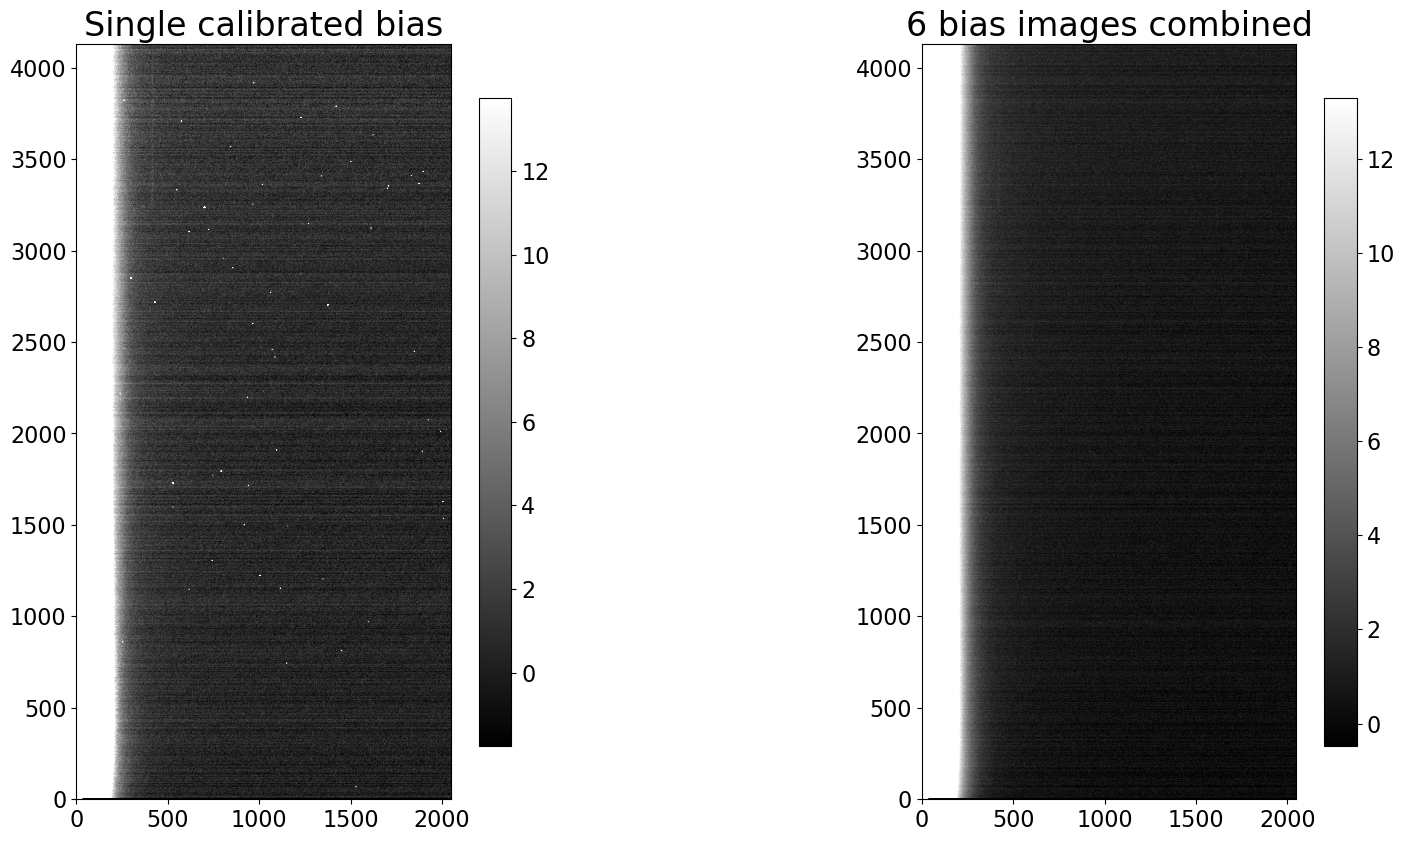

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

show_image(CCDData.read(calibrated_biases[0]).data, cmap='gray', ax=ax1, fig=fig, percl=90)
ax1.set_title('Single calibrated bias')
show_image(combined_bias.data, cmap='gray', ax=ax2, fig=fig, percl=90)
ax2.set_title('{} bias images combined'.format(len(calibrated_biases)))

<h1>2.3.3. Ejemplo 2: Cámara refrigerada termoeléctricamente

El proceso para combinar las imágenes es exactamente el mismo que en el ejemplo 1. La única diferencia es el directorio que contiene los marcos de polarización calibrados.

In [7]:
calibrated_path = Path('example2-reduced')
reduced_images = ccdp.ImageFileCollection(calibrated_path)

El código a continuación:

    selecciona las imágenes de polarización calibradas,
    
    los combina usando la combinefunción,

    agrega la palabra clave COMBINEDal encabezado para que los pasos de calibración posteriores puedan identificar fácilmente qué sesgo usar, y

    escribe el archivo.

In [8]:
calibrated_biases = reduced_images.files_filtered(imagetyp='bias', include_path=True)

combined_bias = ccdp.combine(calibrated_biases,
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

combined_bias.meta['combined'] = True

combined_bias.write(calibrated_path / 'combined_bias.fit')

INFO:astropy:splitting each image into 22 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 22 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


# 2.3.3.1. Resultado del Ejemplo 2

Text(0.5, 1.0, '10 bias images combined')

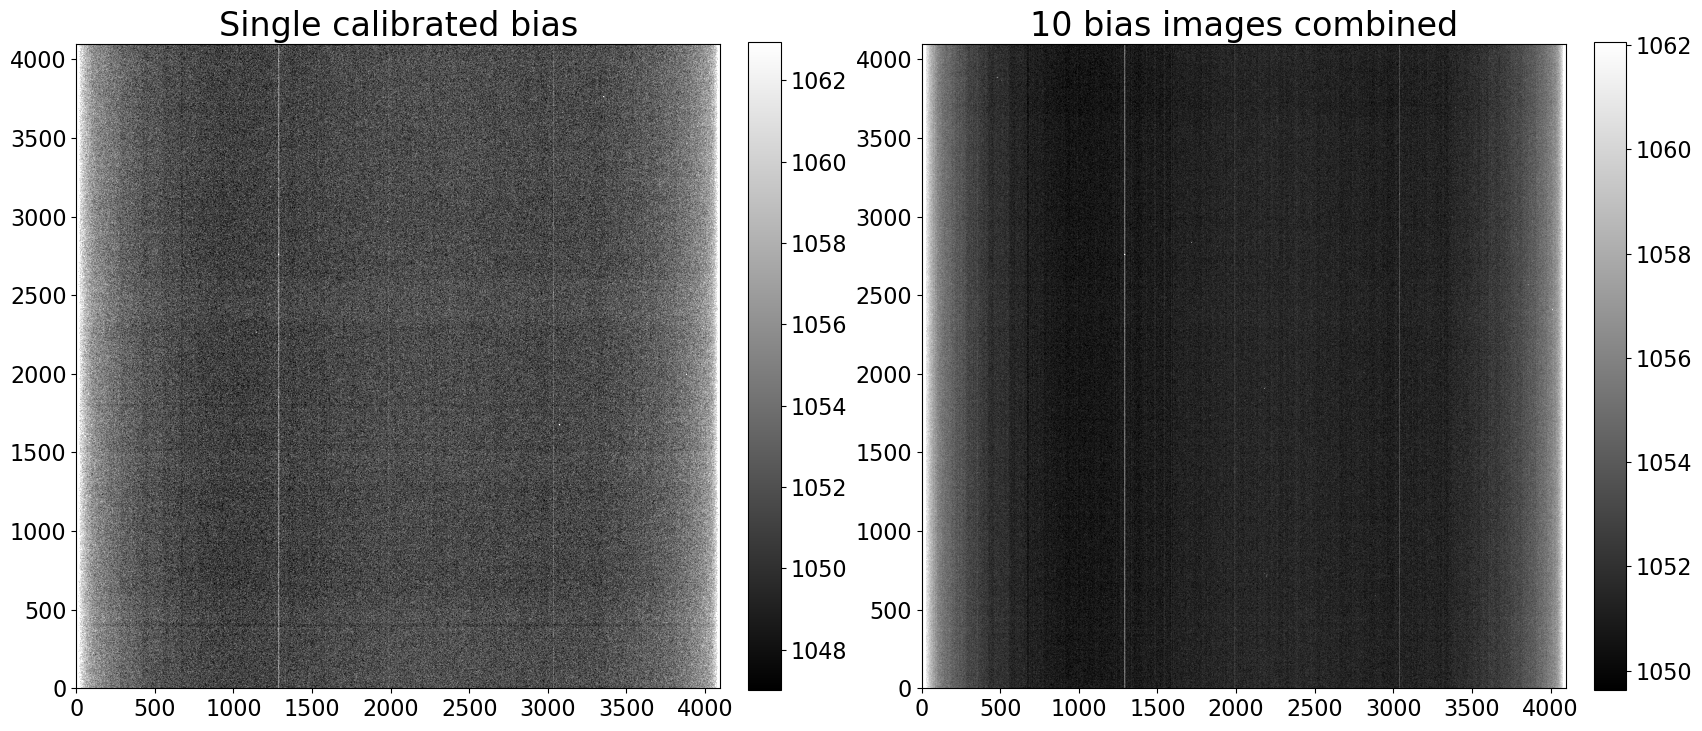

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

show_image(CCDData.read(calibrated_biases[0]).data, cmap='gray', ax=ax1, fig=fig)
ax1.set_title('Single calibrated bias')
show_image(combined_bias.data, cmap='gray', ax=ax2, fig=fig)
ax2.set_title('{} bias images combined'.format(len(calibrated_biases)))